In [23]:
!pip install nltk

In [24]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
pip install plotly_express==0.4

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/gabrielpreda/covid-19-tweets/master/covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [27]:
df.shape

(179108, 13)

In [28]:
needed = ['user_name','date','text']
df = df[needed]
df.head()

,user_name,date,text
0,ᏉᎥ☻լꂅϮ,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


In [29]:
df.user_name = df.user_name.astype('category')
df.user_name = df.user_name.cat.codes

df.date = pd.to_datetime(df.date).dt.date
df.head()

,user_name,date,text
0,89755,2020-07-25,If I smelled the scent of hand sanitizers toda...
1,76403,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,76147,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,84572,2020-07-25,@brookbanktv The one gift #COVID19 has give me...
4,18398,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...


**Picking out the tweet texts**

In [30]:
texts = df['text']

**Removing URLs from tweets**

In [31]:
remove_URL = lambda x: re.sub('https\S+','',str(x))
texts_lr = texts.apply(remove_URL)
texts_lr

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104           2020! The year of insanity! Lol! #COVID19 
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

**Converting all tweets to lowercase**

In [32]:
to_lower = lambda x: x.lower()
texts_lr_lc = texts_lr.apply(to_lower)
texts_lr_lc

0         if i smelled the scent of hand sanitizers toda...
1         hey @yankees @yankeespr and @mlb - wouldn't it...
2         @diane3443 @wdunlap @realdonaldtrump trump nev...
3         @brookbanktv the one gift #covid19 has give me...
4         25 july : media bulletin on novel #coronavirus...
                                ...                        
179103    thanks @iamohmai for nominating me for the @wh...
179104           2020! the year of insanity! lol! #covid19 
179105    @ctvnews a powerful painting by juan lucena. i...
179106    more than 1,200 students test positive for #co...
179107    i stop when i see a stop\n\n@sabcnews\n@izinda...
Name: text, Length: 179108, dtype: object

**Removing punctuations**

In [33]:
remove_punc = lambda x: x.translate(str.maketrans('','',string.punctuation))
texts_lr_lc_np = texts_lr_lc.apply(remove_punc)
texts_lr_lc_np

0         if i smelled the scent of hand sanitizers toda...
1         hey yankees yankeespr and mlb  wouldnt it have...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv the one gift covid19 has give me i...
4         25 july  media bulletin on novel coronavirusup...
                                ...                        
179103    thanks iamohmai for nominating me for the who ...
179104               2020 the year of insanity lol covid19 
179105    ctvnews a powerful painting by juan lucena its...
179106    more than 1200 students test positive for covi...
179107    i stop when i see a stop\n\nsabcnews\nizindaba...
Name: text, Length: 179108, dtype: object

**Sentiment Analysis**

In [36]:
sid = SentimentIntensityAnalyzer()
ps = lambda x: sid.polarity_scores(x)
sentiments_scores = df.text.apply(ps)
sentiments_scores

0         {'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp...
1         {'neg': 0.059, 'neu': 0.844, 'pos': 0.097, 'co...
2         {'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compou...
3         {'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp...
4         {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...
                                ...                        
179103    {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...
179104    {'neg': 0.342, 'neu': 0.449, 'pos': 0.209, 'co...
179105    {'neg': 0.148, 'neu': 0.738, 'pos': 0.115, 'co...
179106    {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...
179107    {'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'comp...
Name: text, Length: 179108, dtype: object

In [37]:
sentiments_df = pd.DataFrame(data = list(sentiments_scores))
sentiments_df.head()

,neg,neu,pos,compound
0,0.000,0.862,0.138,0.4939
1,0.059,0.844,0.097,0.2263
2,0.110,0.890,0.000,-0.2732
3,0.000,0.754,0.246,0.7351
4,0.000,0.839,0.161,0.3182


In [38]:
labelize = lambda x: 'neutral' if x==0 else('positive' if x>0 else 'negative')

In [39]:
sentiments_df['label'] = sentiments_df.compound.apply(labelize)
sentiments_df.head()

,neg,neu,pos,compound,label
0,0.000,0.862,0.138,0.4939,positive
1,0.059,0.844,0.097,0.2263,positive
2,0.110,0.890,0.000,-0.2732,negative
3,0.000,0.754,0.246,0.7351,positive
4,0.000,0.839,0.161,0.3182,positive


In [40]:
data = df.join(sentiments_df.label)
data.head()

,user_name,date,text,label
0,89755,2020-07-25,If I smelled the scent of hand sanitizers toda...,positive
1,76403,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,positive
2,76147,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...,negative
3,84572,2020-07-25,@brookbanktv The one gift #COVID19 has give me...,positive
4,18398,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...,positive


**Plotting the sentiment score counts**

<Axes: xlabel='label', ylabel='count'>

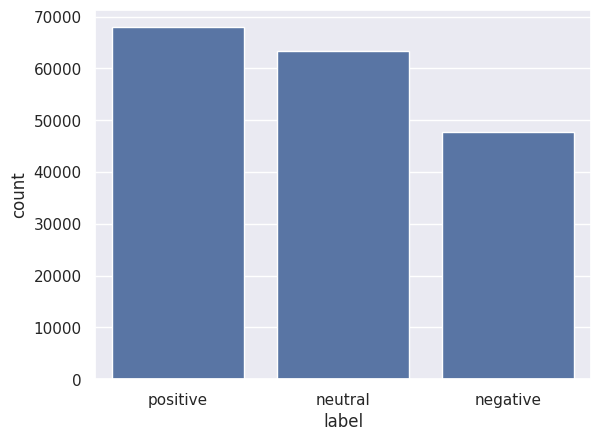

In [42]:
counts_df = data.label.value_counts().reset_index()
sns.barplot(x = 'label', y = 'count',data = counts_df)

In [43]:
data_agg = data[['user_name','date','label']].groupby(['date','label']).count().reset_index()

data_agg.columns = ['date','label','counts']
data_agg.head()

,date,label,counts
0,2020-07-24,negative,92
1,2020-07-24,neutral,96
2,2020-07-24,positive,107
3,2020-07-25,negative,4461
4,2020-07-25,neutral,5878


In [44]:
px.line(data_agg,x = 'date',y='counts',color = 'label',title = 'daily tweets sentimental analysis')